In [130]:
% matplotlib inline
import gmaps
import ipywidgets
import widgetsnbextension
from IPython.display import Image
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

<b>Mapping geo-cordinates</b>

In [131]:
# Loading Google Map API key
with open('../apikey.json') as json_data:
    key = json.load(json_data)['apikey']
gmaps.configure(api_key=str(key))    

In [132]:
trfGeocol=['count','lat', 'lon']
trfGeodf=pd.read_csv("trafficGeo.csv", names=trfGeocol)

In [133]:
trfGeodf.head(5)

,count,lat,lon
0,(28668,"""[u''","u'']"")"
1,(635,"""[u'39.7256765'","u'-105.0132293']"")"
2,(424,"""[u'39.7112036'","u'-104.998902']"")"
3,(386,"""[u'39.7740066'","u'-104.8470371']"")"
4,(353,"""[u'39.7756333'","u'-104.865889']"")"


In [134]:
trfGeodf['count']=trfGeodf['count'].apply(lambda x: x[1:])
trfGeodf['lat']=trfGeodf['lat'].apply(lambda x: x[5:-1])
trfGeodf['lon']=trfGeodf['lon'].apply(lambda x: x[3:-4])

In [135]:
trfGeodf.head(5)

,count,lat,lon
0,28668,,
1,635,39.7256765,-105.0132293
2,424,39.7112036,-104.998902
3,386,39.7740066,-104.8470371
4,353,39.7756333,-104.865889


In [136]:

trfCnt=[]
trfLat=[]
trfLon=[]
for i in trfGeodf.index:
    try:
        trfCnt.append(int(trfGeodf['count'][i]))
        trfLat.append(float(trfGeodf['lat'][i]))
        trfLon.append(float(trfGeodf['lon'][i]))
    except ValueError,e:
        pass
    
    


In [137]:
trfCnt=trfCnt[1:2001]
trfLat=trfLat[1:2001]
trfLon=trfLon[1:2001]

In [138]:
trflocation=[]
for j in range(len(trfLat)):
    trflocation.append((trfLat[j], trfLon[j]))


<b>Mapping traffic violation</b>

In [139]:
trfMap=gmaps.Map()
heatmap_layer = gmaps.heatmap_layer(trflocation,weights=trfCnt,
max_intensity=30, point_radius=10.0
)
trfMap.add_layer(heatmap_layer)
trfMap

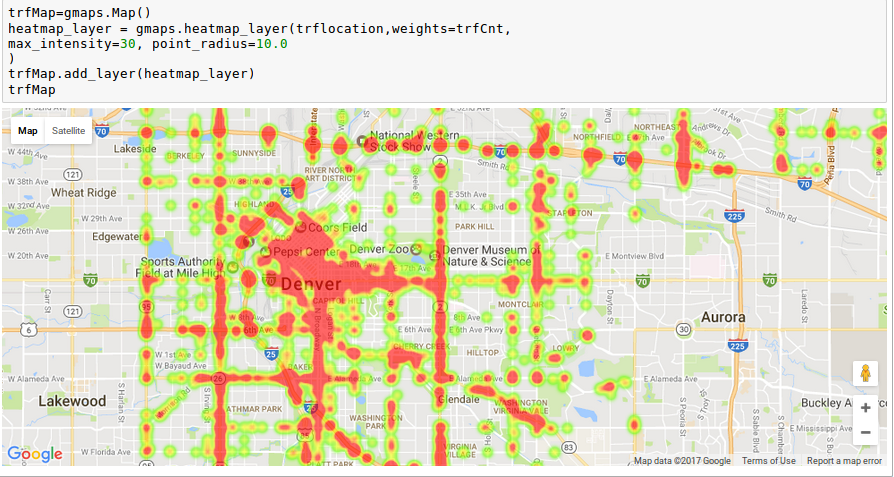

In [140]:
Image(filename='trfMap.png')

In [141]:
crmGeocol=['count','lat', 'lon']
crmGeodf=pd.read_csv("criminalGeo.csv", names=trfGeocol)

In [142]:
crmGeodf.head(5)

,count,lat,lon
0,(58674,"""[u''","u'']"")"
1,(1300,"""[u'39.7696879'","u'-104.8979496']"")"
2,(1160,"""[u'39.7398975'","u'-104.98748499999999']"")"
3,(971,"""[u'39.7280757'","u'-104.9904797']"")"
4,(931,"""[u'39.6775181'","u'-105.0211591']"")"


In [143]:
crmGeodf['count']=crmGeodf['count'].apply(lambda x: x[1:])
crmGeodf['lat']=crmGeodf['lat'].apply(lambda x: x[5:-1])
crmGeodf['lon']=crmGeodf['lon'].apply(lambda x: x[3:-4])

In [144]:
crmCnt=[]
crmLat=[]
crmLon=[]
for i in crmGeodf.index:
    try:
        crmCnt.append(int(crmGeodf['count'][i]))
        crmLat.append(float(crmGeodf['lat'][i]))
        crmLon.append(float(crmGeodf['lon'][i]))
    except ValueError,e:
        pass
    


In [145]:
crmCnt=crmCnt[1:2001]
crmLat=crmLat[1:2001]
crmLon=crmLon[1:2001]


In [146]:
crmlocation=[]
for j in range(len(crmLat)):
    crmlocation.append((crmLat[j], crmLon[j]))


<b>Mapping crimanal offense</b>

In [147]:
crmMap=gmaps.Map()
heatmap_layer = gmaps.heatmap_layer(crmlocation,weights=crmCnt,
max_intensity=30, point_radius=10.0)
crmMap.add_layer(heatmap_layer)
crmMap

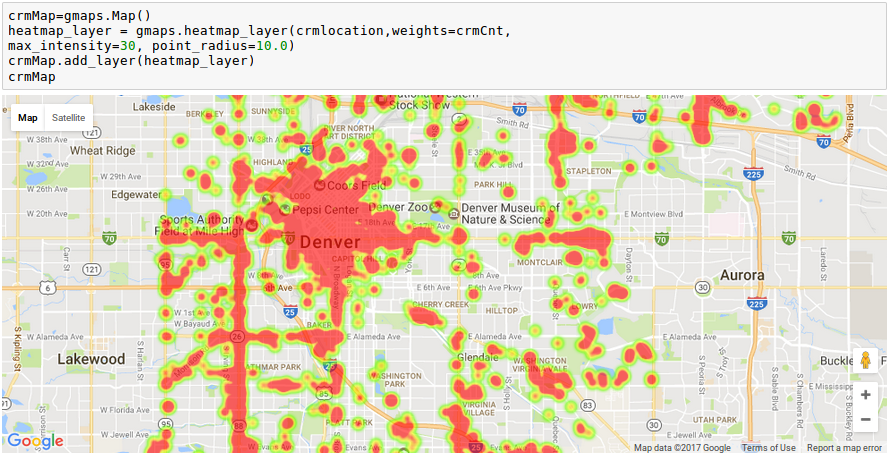

In [148]:
Image(filename='crmMap.png')

<b>Top 10 neighborhood and top 4 violations/offense</b>

In [149]:
trfNcol=['count','nbgh']
trfTcol=['count','type']
trfNdf=pd.read_csv("trafficNbhCnt.csv", names=trfNcol)
trfTdf=pd.read_csv("trafficTypeCnt.csv",names=trfTcol )

In [150]:

trfNdf.head(10)

,count,nbgh
0,(28669,u'')
1,(4967,u'stapleton')
2,(4471,u'baker')
3,(2847,u'hampden-south')
4,(2834,u'five-points')
5,(2641,u'lincoln-park')
6,(2608,u'capitol-hill')
7,(2346,u'montbello')
8,(2185,u'globeville')
9,(2021,u'highland')


In [151]:
trfNdf['count']=trfNdf['count'].apply(lambda x: x[1:])
trfNdf['nbgh']=trfNdf['nbgh'].apply(lambda x: x[3:-2])
trfNdf.head(11)

,count,nbgh
0,28669,
1,4967,stapleton
2,4471,baker
3,2847,hampden-south
4,2834,five-points
5,2641,lincoln-park
6,2608,capitol-hill
7,2346,montbello
8,2185,globeville
9,2021,highland


In [152]:
trfTdf['count']=trfTdf['count'].apply(lambda x: x[1:])
trfTdf['type']=trfTdf['type'].apply(lambda x: x[3:-2])
trfTdf.head(10)

,count,type
0,81984,traffic-accident
1,31429,traffic-accident-hit-and-run
2,3949,traffic-accident-dui-duid
3,193,traf-vehicular-assault
4,26,traf-vehicular-homicide
5,1,burglary-residence-by-force


In [153]:
trfNCnt=[]

for i in trfNdf.index:
    try:
        trfNCnt.append(int(trfNdf['count'][i]))
        
    except ValueError,e:
        pass
trfTCnt=[]

for i in trfTdf.index:
    try:
        trfTCnt.append(int(trfTdf['count'][i]))
        
    except ValueError,e:
        pass
trfN=trfNdf['nbgh']     
trfN=trfN[1:11]
trfNCnt=trfNCnt[1:11]

trfT=trfTdf['type']     
trfT=trfT[1:5]
trfTCnt=trfTCnt[1:5]


<b>Traffic Violations</b>

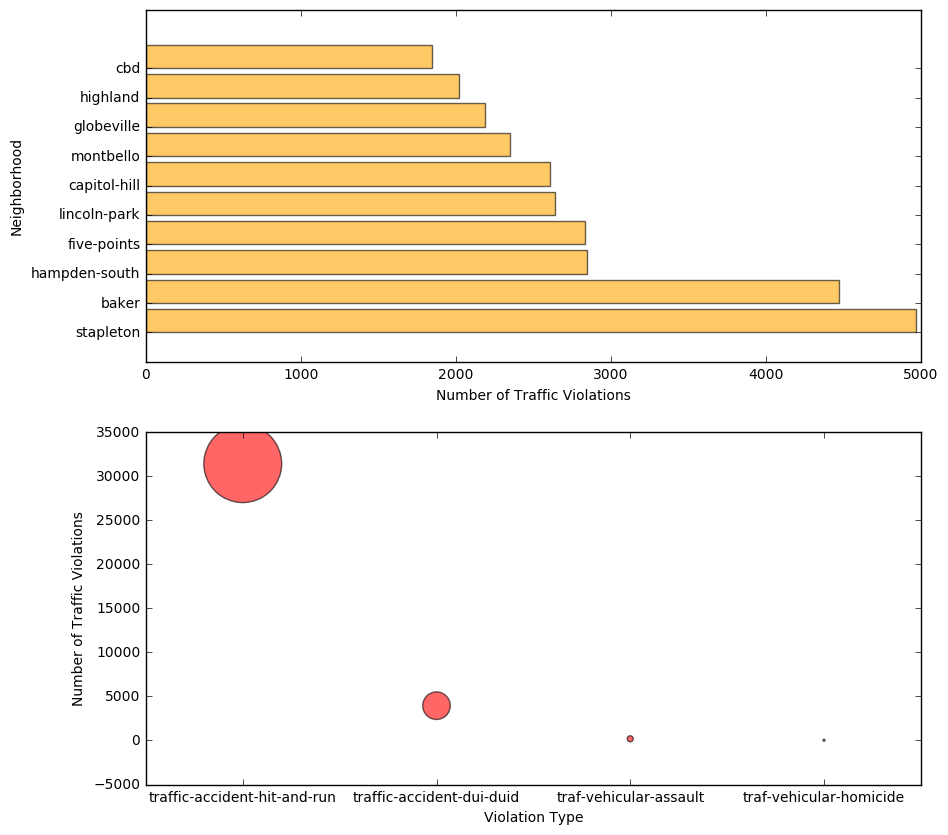

In [154]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.barh(range(1,11),trfNCnt ,  color = "orange",alpha=0.6)
plt.yticks(range(1,11), trfN)
plt.ylabel("Neighborhood")
plt.xlabel("Number of Traffic Violations")
plt.subplot(2,1,2)
plt.scatter(range(1,5),trfTCnt , marker="o", c = "red",alpha=0.6,s=[x/10 for x in trfTCnt])
plt.xticks(range(1,5), trfT)
plt.xlabel("Violation Type")
plt.ylabel("Number of Traffic Violations")
plt.show()

In [155]:
crmNcol=['count','nbgh']
crmTcol=['count','type']
crmNdf=pd.read_csv("criminalNbhCnt.csv", names=trfNcol)
crmTdf=pd.read_csv("criminalTypeCnt.csv",names=trfTcol )

In [156]:
crmNdf['count']=crmNdf['count'].apply(lambda x: x[1:])
crmNdf['nbgh']=crmNdf['nbgh'].apply(lambda x: x[3:-2])
crmNdf.head(11)

,count,nbgh
0,55313,
1,15119,five-points
2,12005,cbd
3,9233,montbello
4,8913,capitol-hill
5,8768,stapleton
6,8219,east-colfax
7,7586,westwood
8,6949,lincoln-park
9,6401,union-station


In [157]:
crmTdf['count']=crmTdf['count'].apply(lambda x: x[1:])
crmTdf['type']=crmTdf['type'].apply(lambda x: x[3:-2])
crmTdf.head(10)

,count,type
0,25642,theft-items-from-vehicle
1,23993,traf-other
2,21066,theft-of-motor-vehicle
3,17915,theft-other
4,14917,criminal-mischief-mtr-veh
5,12196,theft-shoplift
6,11995,criminal-mischief-other
7,10992,assault-simple
8,10602,criminal-trespassing
9,8961,burglary-residence-no-force


In [158]:
crmNCnt=[]

for i in crmNdf.index:
    try:
        crmNCnt.append(int(crmNdf['count'][i]))
        
    except ValueError,e:
        pass
crmTCnt=[]

for i in crmTdf.index:
    try:
        crmTCnt.append(int(crmTdf['count'][i]))
        
    except ValueError,e:
        pass
crmN=crmNdf['nbgh']     
crmN=crmN[1:11]
crmNCnt=crmNCnt[1:11]

crmT=crmTdf['type']     
crmT=crmT[0:6]
crmTCnt=crmTCnt[0:6]


<b>Criminal offenses</b>

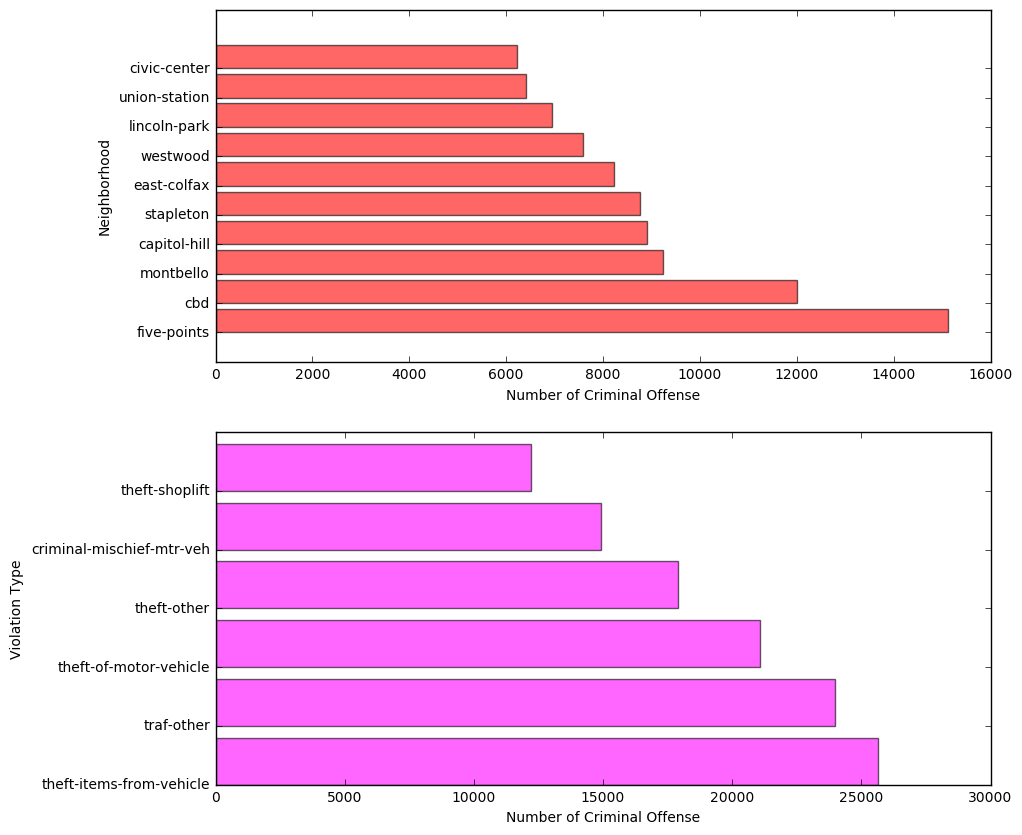

In [129]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.barh(range(1,11),crmNCnt ,  color = "red", alpha=0.6)
plt.yticks(range(1,11), crmN)
plt.ylabel("Neighborhood")
plt.xlabel("Number of Criminal Offense")
plt.subplot(2,1,2)
plt.barh(range(0,6),crmTCnt ,  color = "magenta",alpha=0.6)
plt.yticks(range(0,6), crmT)
plt.ylabel("Violation Type")
plt.xlabel("Number of Criminal Offense")
plt.show()